In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
filename = "/home/haim/code/tumors/data/volume_pt1/volume-0.nii"

scan = nib.load(filename)

In [3]:
vol = scan.get_fdata()

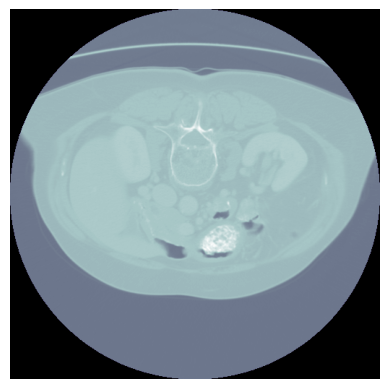

In [4]:
plt.imshow(vol[:, :, 50].T, cmap='bone')
plt.axis('off')
plt.show()

In [10]:
vol.shape
vol_values = vol.flatten()

(array([4.182900e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

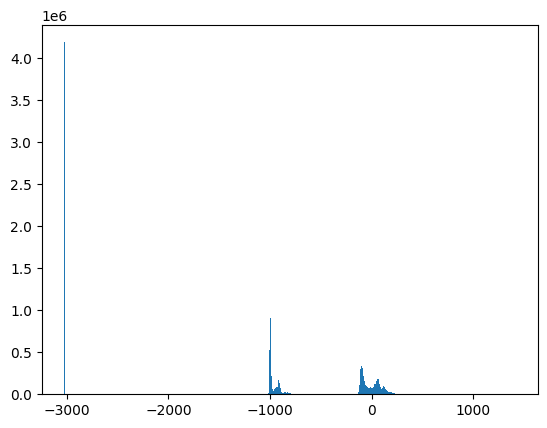

In [11]:
plt.hist(vol_values, bins=1000)

In [144]:
liver_segment_filename = "/home/haim/code/tumors/data/volume_pt1/segmentations/liver.nii.gz"
liver_segment = nib.load(liver_segment_filename)
liver_array = liver_segment.get_fdata()

In [97]:
spleen_segment_filename = "/home/haim/code/tumors/data/volume_pt1/segmentations/spleen.nii.gz"
spleen_segment = nib.load(spleen_segment_filename)
spleen_array = spleen_segment.get_fdata() * 2

In [ ]:
spleen_segment_filename = "/home/haim/code/tumors/data/volume_pt1/segmentations/spleen.nii.gz"
spleen_segment = nib.load(spleen_segment_filename)
spleen_array = spleen_segment.get_fdata() * 3

In [143]:
tumor_segment_filename = "/home/haim/code/tumors/data/segmentations/segmentation-0.nii"
tumor_segment = nib.load(tumor_segment_filename)

tumor_array = tumor_segment.get_fdata()
tumor_array[tumor_array == 2.0] = 0.0

In [134]:
masks =spleen_array + tumor_array #  liver_array + 

In [138]:
liver_array[liver_array == 0] = np.nan
# spleen_array[spleen_array == 0] = np.nan
masks[masks == 0] = np.nan

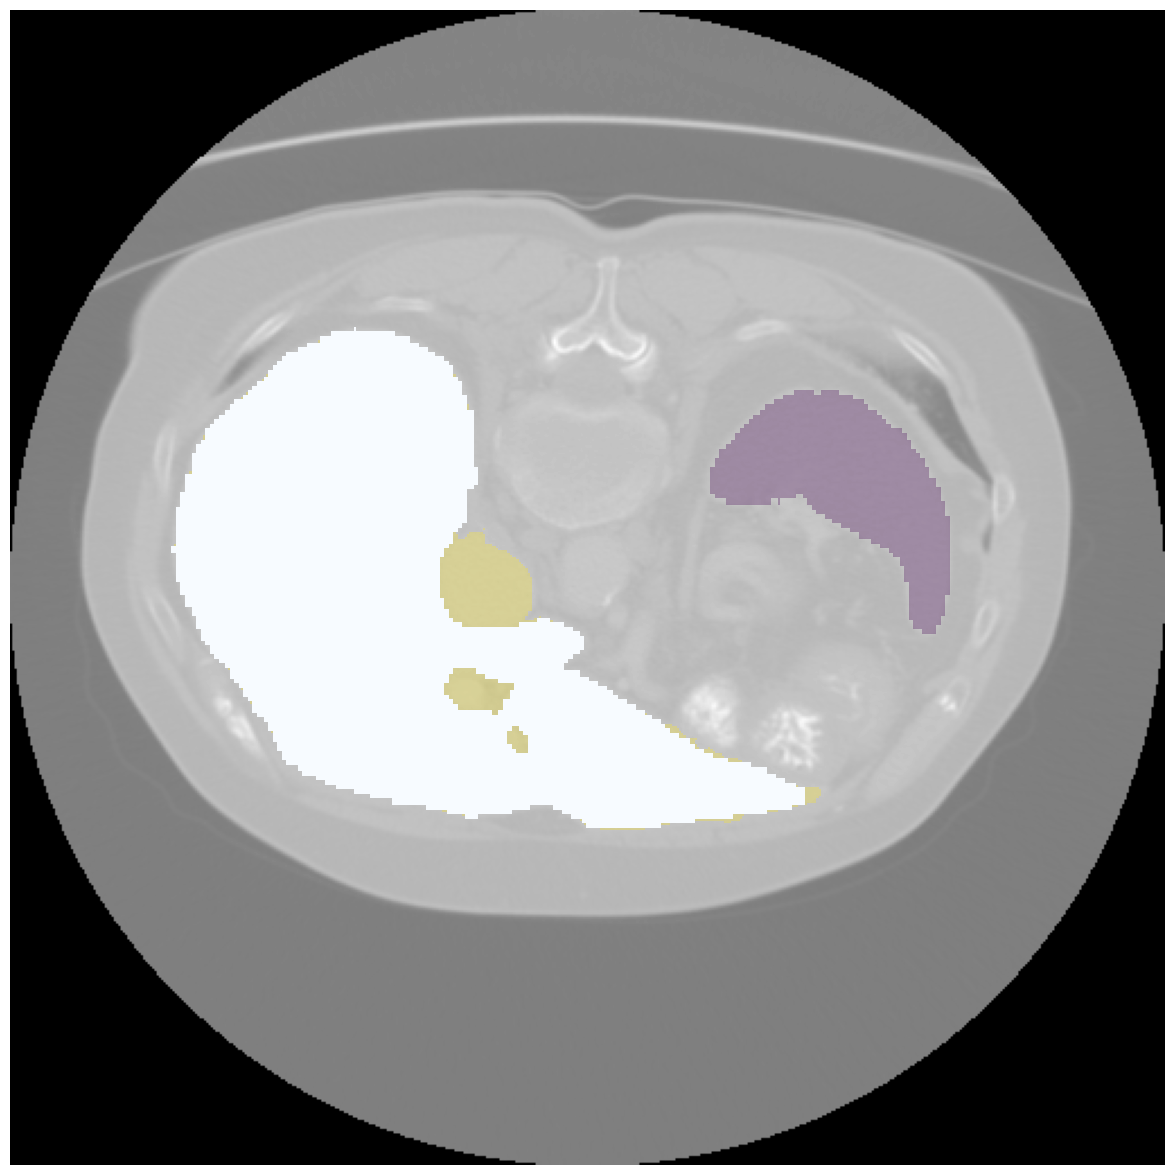

In [139]:
idx = 60
plt.figure(figsize=(15, 15))
plt.imshow(vol[:, :, idx].T, cmap="gray")
plt.imshow(masks[:, :, idx].T, cmap="viridis", alpha=0.3)
plt.imshow(liver_array[:, :, idx].T, cmap="Blues")

plt.axis('off')
plt.show()

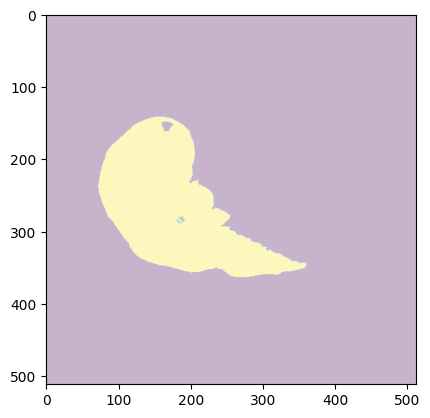

In [142]:
plt.imshow(tumor_array[:, :, idx].T, cmap="viridis", alpha=0.3)

In [118]:
np.unique(tumor_array)

array([0., 6.])

In [140]:
from torchmetrics.functional import jaccard_index

In [151]:
import torch
torch.cuda.is_available()
device = "cuda"

In [154]:
y_hat = torch.tensor(liver_array, device=device)
y = torch.tensor(tumor_array, device=device)

In [155]:
jaccard_index(y_hat, y, task="binary")

tensor(0.9075, device='cuda:0')